Importing all libaries nessesary

In [ ]:
%pip install pandas
%pip install matplotlib

In [1]:
import pandas as pd
import json 
import matplotlib.pyplot as plt

This goes through the JSONL file in a loop with O(n) runtime. Due to length of the file this is inefficant and another way needs to be found.

In [2]:
# Initialize an empty list to store the JSON objects
data = []


# df = pd.DataFrame()
# df= pd.read_json('ca_test_data_final_OFFICIAL.jsonl')


# Open the file and read line by line
with open('ca_test_data_final_OFFICIAL.jsonl', 'r') as file:
    for line in file:
        # Parse each line as a JSON object and append to the list
        data.append(json.loads(line))

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)
df.head()
print("Notebook 1 = best notebook because I said so thats why")

Notebook 1 = best notebook because I said so thats why


Much simpilar verson that does most of the same thing, but does not seperate it the same as the previous verson instead putting it into coloumbs. (This is incorect this does put the data into coloumbs)

In [3]:
df = pd.read_json('ca_test_data_final_OFFICIAL.jsonl', lines=True)
df.head()

,bill_id,text,summary,title,sum_len,text_len
0,SB 2,The people of the State of California do enact...,Existing property tax law establishes a vetera...,An act to amend Section 215.1 of the Revenue a...,1181,8203
1,SB 6,The people of the State of California do enact...,Existing law provides that the Board of Parole...,"An act to amend Section 3550 of, and to add Se...",1435,8975
2,SB 8,The people of the State of California do enact...,The Sales and Use Tax Law imposes a tax on ret...,An act\nto add Chapter 3.8 (commencing with Se...,1170,13667
3,SB 9,The people of the State of California do enact...,"Existing law requires all moneys, except for f...","An act to amend Sections 75220, 75221, and 752...",3050,11091
4,SB 19,The people of the State of California do enact...,Existing law defines a request regarding resus...,An act to add and repeal Section 4788 of the P...,3255,6624


Histogram plot of the Sumerization length. Top is with outlires and the bottom is with one outlire removed. 

<Axes: ylabel='Frequency'>

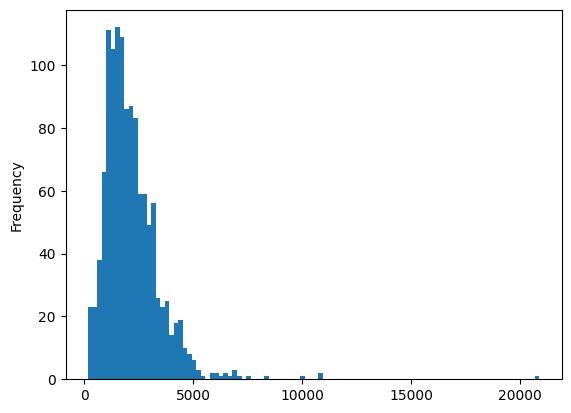

In [4]:
df["sum_len"].plot(kind = "hist", bins=100)


<Axes: ylabel='Frequency'>

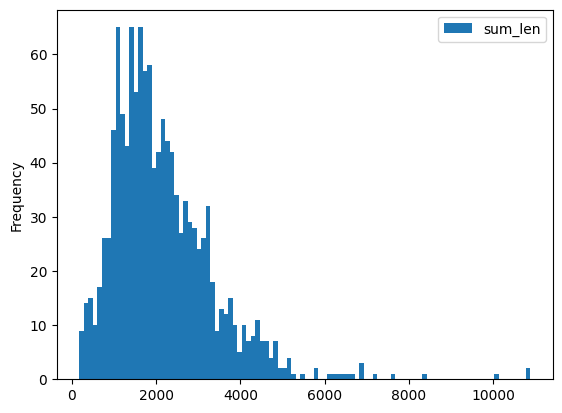

In [7]:
df.loc[df["sum_len"]!=df["sum_len"].max()].plot(x="text_len",kind = "hist", bins=100)